<a href="https://colab.research.google.com/github/chetan7330/ML-CBP/blob/main/ML_CBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-70b0e774df09>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_volume_range_counts.index, y=traffic_volume_range_counts.values, palette='viridis')


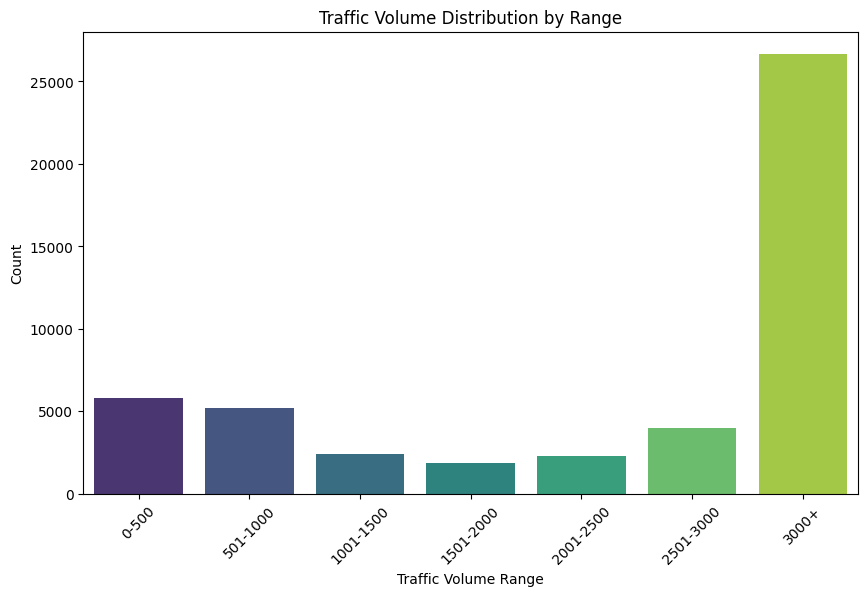

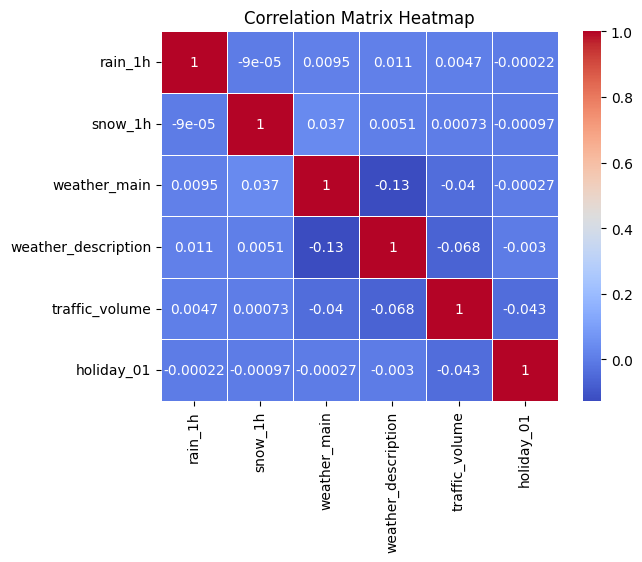

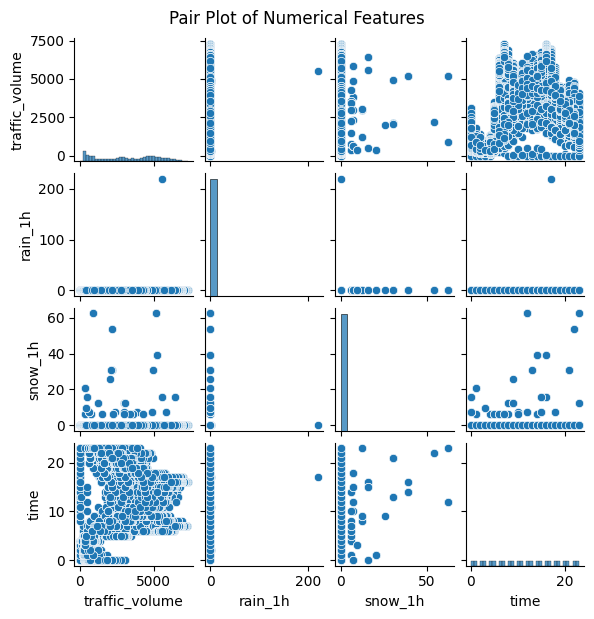

<ipython-input-8-70b0e774df09>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clouds_all', y='traffic_volume', data=df, palette='Set2')


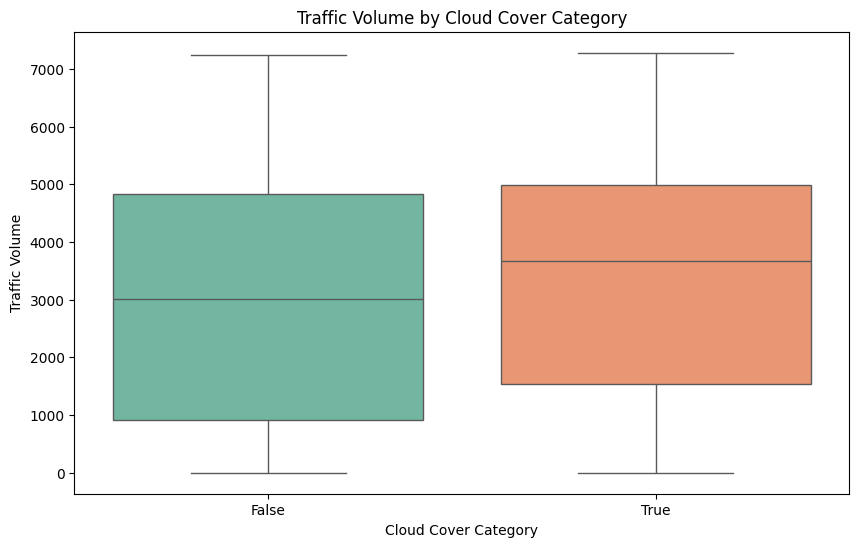

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv")

df.head()

# Step 1: Extract time only from the datetime column and preprocess holiday column
df['time'] = pd.to_datetime(df['date_time']).dt.hour # Extract hour for simplicity
df = df.drop(columns=['date_time']) # Drop the original date_time column


# Convert 'holiday' column to binary (0 for None, 1 for any holiday)
df['holiday_01'] = df['holiday'].apply(lambda x: 0 if pd.isna(x) else 1)
df['holiday_01'].value_counts()
df=df.drop(columns=['holiday'])


# Step 2: Convert clouds_all to categorical based on binning
df['clouds_all'] = pd.cut(df['clouds_all'], bins=[-1, 20, 80, 100], labels=['Low', 'Medium', 'High'])

# Step 3: Encode categorical columns
label_encoder = LabelEncoder()
df['weather_main'] = label_encoder.fit_transform(df['weather_main'])
df['weather_description'] = label_encoder.fit_transform(df['weather_description'])

# Step 4: Convert temperature and other numerical variables to categorical if applicable
df['temp_category'] = pd.cut(df['temp'], bins=[-float('inf'), 273, 293, float('inf')],
labels=['Cold', 'Mild', 'Warm'])
df = df.drop(columns=['temp']) # Drop the original temp column if not needed

# Step 5: One-hot encode the categorical columns created in steps 2 and 4
df = pd.get_dummies(df, columns=['clouds_all', 'temp_category'], drop_first=True)

# Step 6: Standardize remaining numerical columns if necessary
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['traffic_volume'])
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split data into features and target
X = df.drop(columns=['traffic_volume']) # 'traffic_volume' is the target variable
y = df['traffic_volume']

# Create traffic volume bins
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, float('inf')] # You can adjust these ranges as needed
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3000+']

# Add a new column for traffic volume ranges
df['traffic_volume_range'] = pd.cut(df['traffic_volume'], bins=bins, labels=labels, right=False)

# Create the bar plot for traffic volume ranges
plt.figure(figsize=(10, 6))
traffic_volume_range_counts = df['traffic_volume_range'].value_counts().sort_index()
sns.barplot(x=traffic_volume_range_counts.index, y=traffic_volume_range_counts.values, palette='viridis')

plt.xlabel('Traffic Volume Range')
plt.ylabel('Count')
plt.title('Traffic Volume Distribution by Range')
plt.xticks(rotation=45)
plt.show()

numeric_df = df.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_df.corr()

# Plot the heatmap for the correlation matrix plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 5. Pair Plot: Pairwise relationships between numerical features
sns.pairplot(df[['traffic_volume', 'rain_1h', 'snow_1h', 'time']], height=1.5)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


# Box Plot: Traffic Volume across different Cloud Cover Categories
plt.figure(figsize=(10, 6))


# Assuming columns after one-hot encoding: 'clouds_all_Medium' and 'clouds_all_High'
df['clouds_all'] = df['clouds_all_Medium'] + df['clouds_all_High'] # Or any method to get cloud categories
sns.boxplot(x='clouds_all', y='traffic_volume', data=df, palette='Set2')

plt.xlabel('Cloud Cover Category')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Cloud Cover Category')
plt.show()


In [ ]:
df.head()

,rain_1h,snow_1h,weather_main,weather_description,traffic_volume,time,holiday_01,clouds_all_Medium,clouds_all_High,temp_category_Mild,temp_category_Warm,traffic_volume_range,clouds_all
0,-0.007463,-0.027228,-0.566905,0.831600,5545,9,-0.035596,True,False,True,False,3000+,True
1,-0.007463,-0.027228,-0.566905,-1.621016,4516,10,-0.035596,True,False,True,False,3000+,True
2,-0.007463,-0.027228,-0.566905,0.274187,4767,11,-0.035596,False,True,True,False,3000+,True
3,-0.007463,-0.027228,-0.566905,0.274187,5026,12,-0.035596,False,True,True,False,3000+,True
4,-0.007463,-0.027228,-0.566905,-1.621016,4918,13,-0.035596,True,False,True,False,3000+,True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Implementation
#Linear Regression
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1622.0425374279862
Mean Squared Error (MSE): 3368769.2193185557
Root Mean Squared Error (RMSE): 1835.4207199763644
R-squared (R2): 0.14790497895719568


In [ ]:
#Implementation
#Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 7: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Create polynomial features (e.g., degree=2 for quadratic features)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 9: Train the Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 10: Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Step 11: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE separately using NumPy if 'squared' parameter is not available
rmse = np.sqrt(mse)

print(y_pred)
r2 = r2_score(y_test, y_pred)

print("Polynomial Regression Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

#Accuracy Test
print(model.score(X_test_poly, y_test))

[3780.64063991 2876.95513391 -553.65344836 ... 2464.20271286 2353.59535907
  978.12327662]
Polynomial Regression Model Evaluation Metrics:
Mean Absolute Error (MAE): 899.98
Mean Squared Error (MSE): 1353854.04
Root Mean Squared Error (RMSE): 1163.55
R-squared (R2): 0.6576
0.6575567467719687


In [ ]:
#Implementation
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) # Calculate MSE

# Calculate RMSE separately using NumPy's sqrt function.
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 624.4812611786515
Mean Squared Error (MSE): 871719.0345395589
Root Mean Squared Error (RMSE): 933.658949798886
R-squared (R2): 0.7795077665695213


In [ ]:
#Arima Model

